In [50]:
import pandas as pd
import numpy as np

In [51]:
tsb = pd.read_excel('Beer.xls',header=None,names=('date','val'))
tsb.head()

,date,val
0,1967-01-01,8.38
1,1967-02-01,8.15
2,1967-03-01,10.68
3,1967-04-01,10.77
4,1967-05-01,10.26


In [52]:
tsb.shape[0]/12

13.0

Данные чистые

<Axes: xlabel='date'>

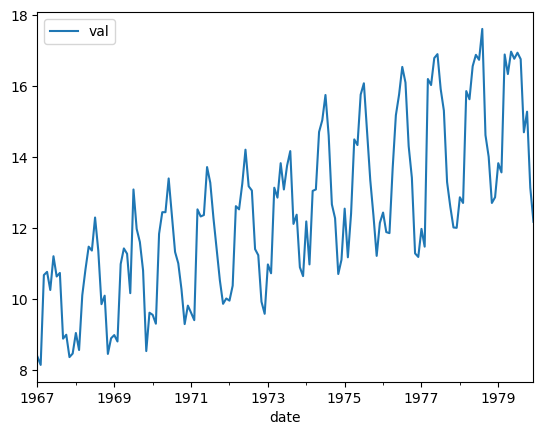

In [53]:
tsb.plot(x='date',y='val')

In [54]:
trainData = tsb.val[:-12].to_numpy()
testData = tsb.val[-12:].to_numpy()
testData.shape

(12,)

<Axes: xlabel='date'>

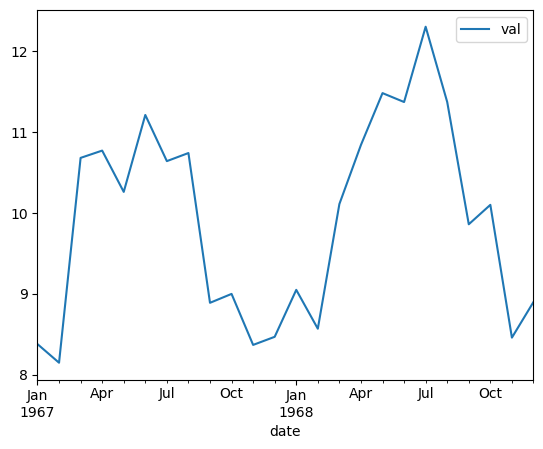

In [55]:
tsb[:24].plot(x='date',y='val')

In [56]:
def diff(x,p=1):
    if p == 2:
        return x[2:] - 2 * x[1:-1] + x[:-2]
    return x[1:] - x[:-1]

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

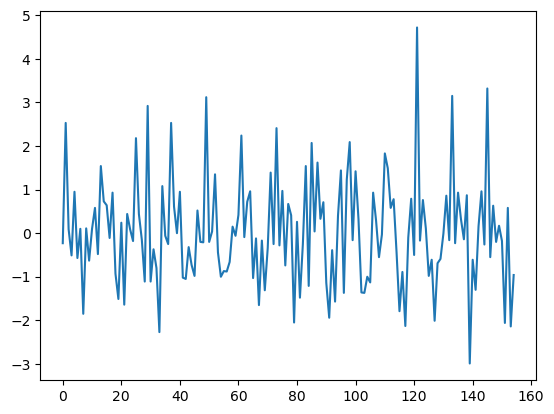

In [58]:
plt.plot(diff(tsb.val.to_numpy()))

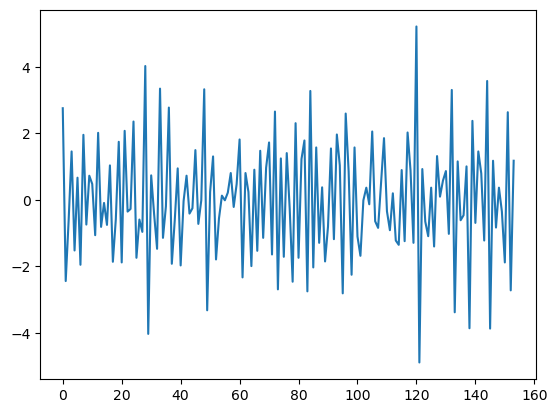

In [59]:
plt.plot(diff(tsb.val.to_numpy(),p=2))

In [60]:
def movAv(x,p):
    if p % 2 == 0:
        p2 = p//2
        nx = x[:-p-1]*0
        for i in range(nx.shape[0]):
            nx[i] = (np.sum(x[i:p+i]) / p + np.sum(x[i+1:i+p+1]) / p)/2
        return nx
    nx = np.cumsum(x, dtype=float)
    nx[p:] = nx[p:] - nx[:-p]
    return nx[p - 1:] / p
    


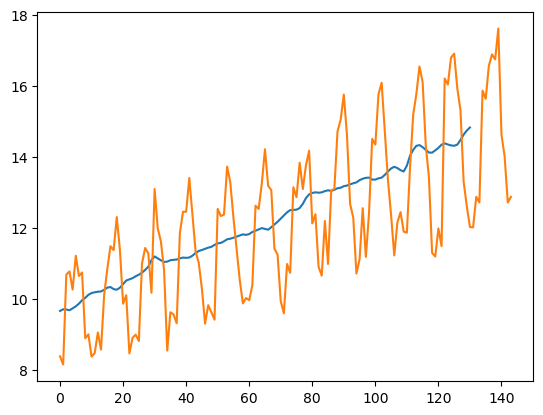

In [61]:
mAs = movAv(trainData,12)
plt.plot(mAs)
plt.plot(trainData)
plt.show()

In [62]:
from sklearn import linear_model


In [63]:
mAs.shape

(131,)

In [64]:
x = np.arange(131) + 7
x = x.reshape(131,1)
x[:10]

array([[ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [65]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x, mAs)
regr.coef_

array([0.03811732])

In [66]:
regr.coef_[0]

0.03811731525471983

In [67]:
regr.intercept_

9.420066660438799

In [68]:
def trend(x):    
    return regr.intercept_+regr.coef_[0]*(x)

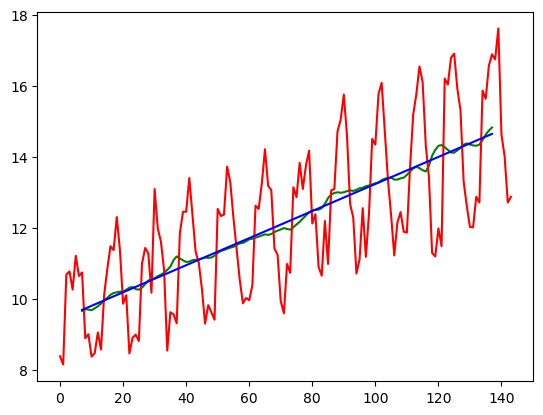

In [69]:
mAs = movAv(trainData,12)
plt.plot(np.arange(131)+7,mAs,color='green')
plt.plot(trainData,color='red')
plt.plot(np.arange(131)+7,trend(np.arange(131)+7),color='blue')
plt.show()

In [70]:
x = np.arange(131)+7
(131-11)/12
trainData = trainData.reshape(144,1)
tr = trend(x).reshape(131,1)
tmp = trainData[7:-6] - tr
tmp.shape

(131, 1)

In [71]:
tmp = trainData[7:-6] - tr
season = np.zeros(12)
for i in range(12):
    season[i] = np.mean(tmp[i::12])
season

array([ 1.26880049, -0.19931683, -0.68652505, -2.03282418, -1.80548695,
       -1.23814972, -1.70717613,  0.54197928,  0.93749833,  1.52301738,
        1.85399097,  2.06348664])

In [72]:
def seasc(t):
    return season[(t+5)%12]

In [73]:
def linpred(t):
    return trend(t) + seasc(t)

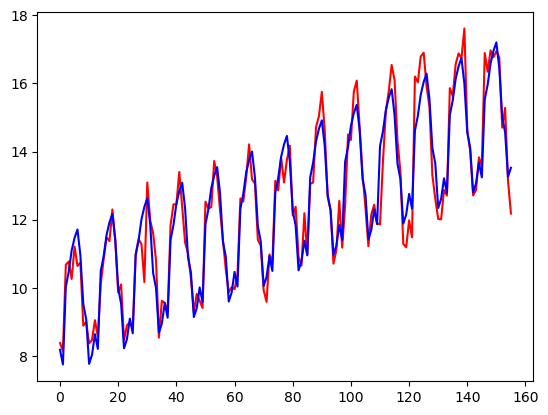

In [74]:
x = np.arange(156)
plt.plot(tsb.val.to_numpy(),color='red')
plt.plot(x,linpred(x),color='blue')
plt.show()

In [75]:
x = np.arange(tsb.val.shape[0])
x = x.reshape(tsb.val.shape[0],1)
x.shape

(156, 1)

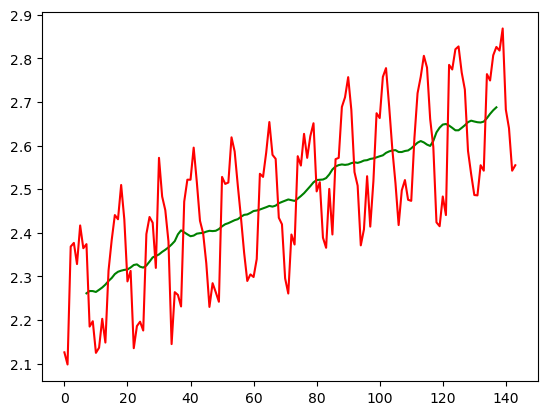

In [76]:
trainlog = np.log(trainData)
mAslog = movAv(trainlog,12)
x = np.arange(131)+7
plt.plot(x,mAslog,color='green')
plt.plot(trainlog,color='red')
plt.show()

In [77]:
mAslog = mAslog.reshape(131,1)
x = x.reshape(131,1)
mAslog.shape

(131, 1)

In [78]:
regrlog = linear_model.LinearRegression()
# Train the model using the training sets
regrlog.fit(x, mAslog)
regrlog.coef_[0,0]

0.003143177499508846

In [79]:
regrlog.intercept_[0]

2.257023223240693

In [80]:
def trendlog(x):    
    return regrlog.intercept_[0]+regrlog.coef_[0,0]*(x)

In [81]:
x = np.arange(131)+7
tr = trendlog(x).reshape(131,1)
seasonlog = np.zeros(12)
tmp = np.log(trainData[7:-6]) - tr
tmp.shape


(131, 1)

In [82]:
for i in range(12):
    seasonlog[i] = np.mean(tmp[i::12])

def seasclog(t):
    return seasonlog[(t+5)%12]

def logpred(t):
    return np.exp(trendlog(t) + seasclog(t))

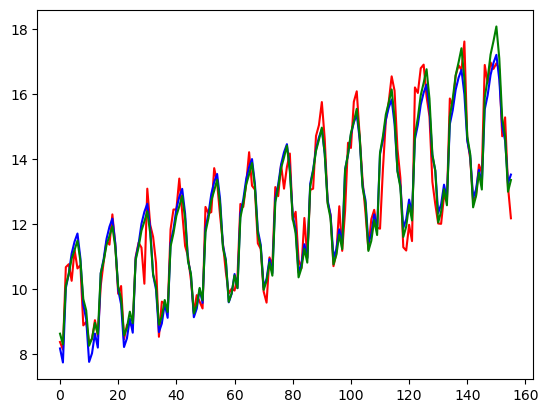

In [83]:
x = np.arange(156)
plt.plot(tsb.val.to_numpy(),color='red')
plt.plot(x,linpred(x),color='blue')
plt.plot(x,logpred(x),color='green')
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error as mse
testData = testData.reshape(testData.shape[0],1)
testData.shape

(12, 1)

In [87]:
mse(testData,logpred(np.arange(12)+144))

0.46320004349959865

In [86]:
mse(testData,linpred(np.arange(12)+144))

0.4093060216186683

экспоненциальная модель оказалась лучше